# Logistic Regression

In [63]:
import LogisticRegression as LR

## Load in Wine Dataset

In [86]:
import pandas as pd
import GenerativeCollection as gc

data = pd.read_csv("wine.csv", header=None)
data.columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', \
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Logistic Regression for 2 classes with polynomial transformation

In [90]:
bin_data = data[(data['class'] == 1) | (data['class'] == 2)]
bin_data['Ash_sq'] = bin_data['Ash'] ** 2
bin_data['Alcohol_sq'] = bin_data['Alcohol'] ** 2
bin_data['Magnesium_sq'] = bin_data['Magnesium'] ** 2

/home/hanqiao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/hanqiao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/hanqiao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

## Fit a Logistic Regression classifier on polynomial transformed dataset

In [91]:
features = bin_data.columns.tolist()
features.pop(0)
lr = LR.LogisticRegression(bin_data, features, ['class'])

In [103]:
lr.fit(initial_coefficients=np.zeros(17), step_size=5e-3, l2_penalty=0.2, max_iter=1000)
lr.evaluate(bin_data, features, ['class'])

Classes: [1 2]
Accuracy: 0.969230769231
Recall: [0.9661016949152542, 0.971830985915493]
Precision: [0.9661016949152542, 0.971830985915493]
F1 score: [0.9661016949152542, 0.971830985915493]


[0.9661016949152542, 0.971830985915493]

## Measure model performance using 5_fold cross_validation

In [104]:
from sklearn.cross_validation import StratifiedKFold
label = bin_data['class']
f_scores = []
skf = StratifiedKFold(label, 5)
for train, test in skf:
    train_data = bin_data.iloc[train]
    test_data = bin_data.iloc[test]
    model = LR.LogisticRegression(train_data, target=['class'], features=features)
    model.fit(initial_coefficients=np.zeros(17), step_size=5e-3, l2_penalty=0.2, max_iter=1000)
    result = model.evaluate(test_data, features, target=['class'])
    f_scores.append(result)

print f_scores
print "Average f_scores:"
print np.array(f_scores).mean(axis=0)

Classes: [1 2]
Accuracy: 0.851851851852
Recall: [1.0, 0.7333333333333333]
Precision: [0.75, 1.0]
F1 score: [0.8571428571428571, 0.846153846153846]
Classes: [1 2]
Accuracy: 1.0
Recall: [1.0, 1.0]
Precision: [1.0, 1.0]
F1 score: [1.0, 1.0]
Classes: [1 2]
Accuracy: 0.961538461538
Recall: [0.9166666666666666, 1.0]
Precision: [1.0, 0.9333333333333333]
F1 score: [0.9565217391304348, 0.9655172413793104]
Classes: [1 2]
Accuracy: 1.0
Recall: [1.0, 1.0]
Precision: [1.0, 1.0]
F1 score: [1.0, 1.0]
Classes: [1 2]
Accuracy: 0.96
Recall: [1.0, 0.9285714285714286]
Precision: [0.9166666666666666, 1.0]
F1 score: [0.9565217391304348, 0.962962962962963]
[[0.8571428571428571, 0.846153846153846], [1.0, 1.0], [0.9565217391304348, 0.9655172413793104], [1.0, 1.0], [0.9565217391304348, 0.962962962962963]]
Average f_scores:
[ 0.95403727  0.95492681]


## Logistic Regression for K class discrimination

In [36]:
features = data.columns.tolist()
features.pop(0)
lr = LR.LogisticRegression(data, features, ['class'])
lr.feature_m.shape

(178, 15)

In [37]:
lr.fit(initial_coefficients=np.zeros(15), step_size=5e-3, l2_penalty=0, max_iter=1000)

In [38]:
lr.predict(data, features)

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Training Error with l2_penalty = 0

In [39]:
lr.evaluate(data, features, ['class'])

Classes: [1 2 3]
Accuracy: 0.983146067416
Recall: [0.9661016949152542, 0.9859154929577465, 1.0]
Precision: [1.0, 0.9722222222222222, 0.9795918367346939]
F1 score: [0.9827586206896551, 0.979020979020979, 0.9896907216494846]


[0.9827586206896551, 0.979020979020979, 0.9896907216494846]

## 5 fold Cross Validation to measure model performance

In [41]:
from sklearn.cross_validation import StratifiedKFold
label = data['class']
f_scores = []
skf = StratifiedKFold(label, 5)
for train, test in skf:
    train_data = data.iloc[train]
    test_data = data.iloc[test]
    model = LR.LogisticRegression(train_data, target=['class'], features=features)
    model.fit(initial_coefficients=np.zeros(15), step_size=5e-3, l2_penalty=0, max_iter=1000)
    result = model.evaluate(test_data, features, target=['class'])
    f_scores.append(result)

print f_scores
print "Average f_scores:"
print np.array(f_scores).mean(axis=0)

Classes: [1 2 3]
Accuracy: 0.891891891892
Recall: [1.0, 0.7333333333333333, 1.0]
Precision: [0.8, 1.0, 0.9090909090909091]
F1 score: [0.888888888888889, 0.846153846153846, 0.9523809523809523]
Classes: [1 2 3]
Accuracy: 0.944444444444
Recall: [1.0, 0.8571428571428571, 1.0]
Precision: [0.9230769230769231, 1.0, 0.9090909090909091]
F1 score: [0.9600000000000001, 0.923076923076923, 0.9523809523809523]
Classes: [1 2 3]
Accuracy: 0.944444444444
Recall: [0.8333333333333334, 1.0, 1.0]
Precision: [1.0, 0.875, 1.0]
F1 score: [0.9090909090909091, 0.9333333333333333, 1.0]
Classes: [1 2 3]
Accuracy: 1.0
Recall: [1.0, 1.0, 1.0]
Precision: [1.0, 1.0, 1.0]
F1 score: [1.0, 1.0, 1.0]
Classes: [1 2 3]
Accuracy: 0.970588235294
Recall: [1.0, 0.9285714285714286, 1.0]
Precision: [1.0, 1.0, 0.9]
F1 score: [1.0, 0.962962962962963, 0.9473684210526316]
[[0.888888888888889, 0.846153846153846, 0.9523809523809523], [0.9600000000000001, 0.923076923076923, 0.9523809523809523], [0.9090909090909091, 0.9333333333333333, 

# Multilayer Perceptron 

In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import os
from pylab import *

mnist = fetch_mldata('MNIST original')
print mnist.data.shape
print mnist.target.shape
print np.unique(mnist.target)

(70000, 784)
(70000,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


## Select 3 classes and encoding labels that are used to fit a MLP classifier

In [2]:
from sklearn.utils import shuffle

def oneHotEncoding(y):
    classes = np.unique(y)
    result = np.zeros((len(y), len(classes)))
    for i in range(len(y)):
        result[i][int(y[i])] = 1.0
    return result

X, y = mnist.data / 255.0, mnist.target
X = X[y <= 2]
y = y[y <= 2]
print X.shape
print np.unique(y)
y = oneHotEncoding(y)
X, y = shuffle(X, y, random_state=0)
X_train, X_test = X[:17000], X[17000:]
y_train, y_test = y[:17000], y[17000:]

(21770, 784)
[ 0.  1.  2.]


## Fit a MLP classifier 

In [3]:
import MLP as m
mlp = m.MLP(X_train, y_train, learning_rate=1e-3, epochs=16000, batch_size=150, n_hidden=256)

In [4]:
mlp.fit(X_test, y_test)

Epoch: 1 
Cost = 4.31901
Epoch: 2001 
Cost = 0.902357
Epoch: 4001 
Cost = 0.566039
Epoch: 6001 
Cost = 0.597935
Epoch: 8001 
Cost = 0.565437
Epoch: 10001 
Cost = 0.429614
Epoch: 12001 
Cost = 0.270421
Epoch: 14001 
Cost = 0.172502
Optimization Finished!
Training Accuracy after 16000 epochs:  0.929412
Testing Accuracy after 16000 epochs:  0.931656


## Evaluate the Performance as a function of # of units in hidden layer

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

acc = []
units = [10, 20, 50, 90, 140, 200, 250, 300, 350, 400, 500, 600, 800, 1000]
for unit in units:
    model = m.MLP(X_train, y_train, learning_rate=1e-3, epochs=10000, batch_size=150, n_hidden=unit)
    model.fit(X_test, y_test, verbose=False)
    acc.append(model.test_accuracy)

Optimization Finished!
Training Accuracy after 10000 epochs:  0.77
Testing Accuracy after 10000 epochs:  0.771698
Optimization Finished!
Training Accuracy after 10000 epochs:  0.576882
Testing Accuracy after 10000 epochs:  0.573166
Optimization Finished!
Training Accuracy after 10000 epochs:  0.854588
Testing Accuracy after 10000 epochs:  0.861635
Optimization Finished!
Training Accuracy after 10000 epochs:  0.806706
Testing Accuracy after 10000 epochs:  0.811321
Optimization Finished!
Training Accuracy after 10000 epochs:  0.850941
Testing Accuracy after 10000 epochs:  0.84675
Optimization Finished!
Training Accuracy after 10000 epochs:  0.854412
Testing Accuracy after 10000 epochs:  0.859119
Optimization Finished!
Training Accuracy after 10000 epochs:  0.872824
Testing Accuracy after 10000 epochs:  0.869392
Optimization Finished!
Training Accuracy after 10000 epochs:  0.901
Testing Accuracy after 10000 epochs:  0.898323
Optimization Finished!
Training Accuracy after 10000 epochs:  0.

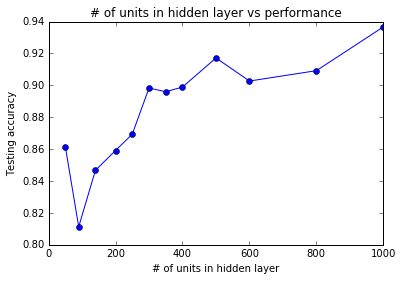

In [17]:
plt.plot(units[2:], acc[2:], 'bo-')
plt.title("# of units in hidden layer vs performance")
plt.xlabel("# of units in hidden layer")
plt.ylabel("Testing accuracy")
plt.show()

### From plot above, we can observe that increasing # of units in hidden layer will increase our model performance in geneal. The curve is not smooth and model performance will vary a lot given a small range of # of units in hidden layer.

## Evaluate the performance as a function of learning rate

In [20]:
acc_learning = []
rates = [1e-6, 5e-5,1e-5, 5e-4, 1e-4, 5e-3, 1e-3, 5e-2, 1e-2, 5e-1, 1e-1]
for rate in rates:
    model = m.MLP(X_train, y_train, learning_rate=rate, epochs=10000, batch_size=150, n_hidden=250)
    model.fit(X_test, y_test, verbose=False)
    acc_learning.append(model.test_accuracy)

Optimization Finished!
Training Accuracy after 10000 epochs:  0.343235
Testing Accuracy after 10000 epochs:  0.354927
Optimization Finished!
Training Accuracy after 10000 epochs:  0.367235
Testing Accuracy after 10000 epochs:  0.375262
Optimization Finished!
Training Accuracy after 10000 epochs:  0.313353
Testing Accuracy after 10000 epochs:  0.331237
Optimization Finished!
Training Accuracy after 10000 epochs:  0.816412
Testing Accuracy after 10000 epochs:  0.8174
Optimization Finished!
Training Accuracy after 10000 epochs:  0.533588
Testing Accuracy after 10000 epochs:  0.538574
Optimization Finished!
Training Accuracy after 10000 epochs:  0.956176
Testing Accuracy after 10000 epochs:  0.953878
Optimization Finished!
Training Accuracy after 10000 epochs:  0.875941
Testing Accuracy after 10000 epochs:  0.874843
Optimization Finished!
Training Accuracy after 10000 epochs:  0.987824
Testing Accuracy after 10000 epochs:  0.983648
Optimization Finished!
Training Accuracy after 10000 epoch

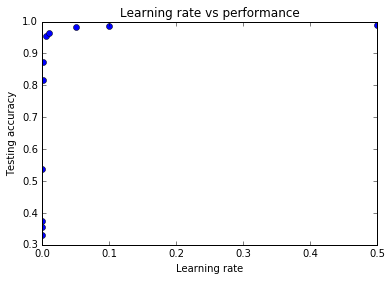

In [29]:
plt.plot(rates, acc_learning, 'bo')
plt.title("Learning rate vs performance")
plt.xlabel("Learning rate")
plt.ylabel("Testing accuracy")
plt.show()

### We can observe that increasing learning rate increases our model performance in general. If the learning rate is too big, the increasing decreases(gradiane of the curve) wiith increasing of learning rate.

## Evaluate model perforance as a function of # of epochs

In [32]:
acc_epoch = []
epochs = [10, 50, 100, 200, 500, 1000, 2000, 5000, 8000, 10000, 15000]
for epoch in epochs:
    model = m.MLP(X_train, y_train, learning_rate=0.1, epochs=epoch, batch_size=150, n_hidden=250)
    model.fit(X_test, y_test, verbose=False)
    acc_epoch.append(model.test_accuracy)

Optimization Finished!
Training Accuracy after 10 epochs:  0.383235
Testing Accuracy after 10 epochs:  0.387631
Optimization Finished!
Training Accuracy after 50 epochs:  0.768824
Testing Accuracy after 50 epochs:  0.76478
Optimization Finished!
Training Accuracy after 100 epochs:  0.898059
Testing Accuracy after 100 epochs:  0.904402
Optimization Finished!
Training Accuracy after 200 epochs:  0.926882
Testing Accuracy after 200 epochs:  0.923061
Optimization Finished!
Training Accuracy after 500 epochs:  0.959
Testing Accuracy after 500 epochs:  0.960797
Optimization Finished!
Training Accuracy after 1000 epochs:  0.972471
Testing Accuracy after 1000 epochs:  0.969811
Optimization Finished!
Training Accuracy after 2000 epochs:  0.979941
Testing Accuracy after 2000 epochs:  0.977149
Optimization Finished!
Training Accuracy after 5000 epochs:  0.988412
Testing Accuracy after 5000 epochs:  0.979874
Optimization Finished!
Training Accuracy after 8000 epochs:  0.991941
Testing Accuracy aft

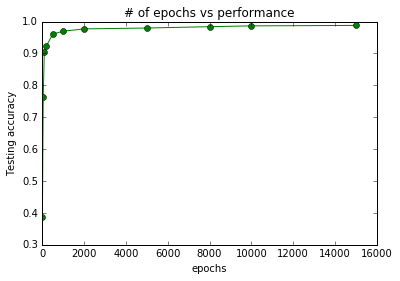

In [35]:
plt.plot(epochs, acc_epoch, 'go-')
plt.title("# of epochs vs performance")
plt.xlabel("epochs")
plt.ylabel("Testing accuracy")
plt.show()

### In genral, model performance increases with more epochs. However when epochs > 2000 the increasing is so small that the advange cannot beat disadvantage of increaing trainning time. Also, we can observe that training and testing accuracy difference increases when epochs is too big, a sign of overfitting. Therefore We choose epochs = 2000.

## Final parameters we are going to use:

1. epochs = 2000
2. learning_rate = 0.5
3. number of units in hidden layer = 500
4. Batch of data in each trainning iteration = 150

### Retrain our model selected on the whole training set

In [60]:
model_final = m.MLP(X_train, y_train, learning_rate=0.5, epochs=2000, batch_size=150, n_hidden=500)

In [61]:
model_final.fit(X_test, y_test, verbose=False)

Optimization Finished!
Training Accuracy after 2000 epochs:  0.995706
Testing Accuracy after 2000 epochs:  0.987841


## Compare implementation with scikit learn implementation 

In [62]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,), max_iter=10, alpha=1e-4,
                    algorithm='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.5)
mlp.fit(X_train, y_train)
print "Testing accuracy:", mlp.score(X_test, y_test)

Iteration 1, loss = 0.44852394
Iteration 2, loss = 0.04120209
Iteration 3, loss = 0.02633738
Iteration 4, loss = 0.01922401
Iteration 5, loss = 0.01305521
Iteration 6, loss = 0.01135816
Iteration 7, loss = 0.00689262
Iteration 8, loss = 0.00337453
Iteration 9, loss = 0.00240454
Iteration 10, loss = 0.00230408
Testing accuracy: 0.994129979036


### Our own implementation is comparable with the the scikit learn implementation. Only 0.007 testing accuracy difference.